# Test basic network behaviors are as expected

## Test passive membrane properties using neurons with different time constants

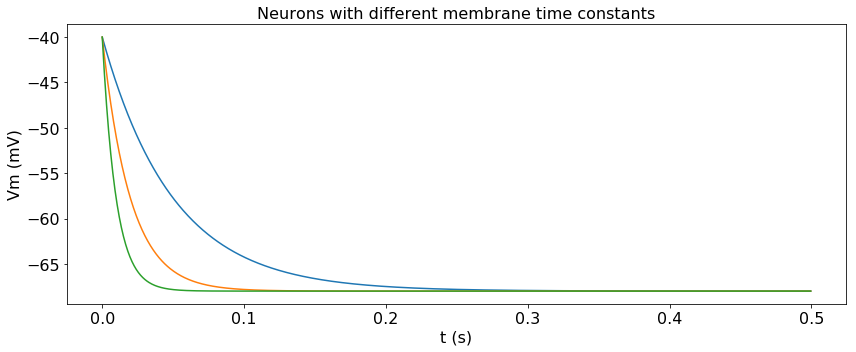

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.036 * np.ones(3)
v_r = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))

vs_0 = -0.04 * np.ones(3)

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_r=v_r, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

rsp = ntwk.run(spks_up=spks_up, dt=dt, vs_0=vs_0)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * rsp.vs)
ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants')

set_font_size(ax, 16)

## Test current injection evoked spiking

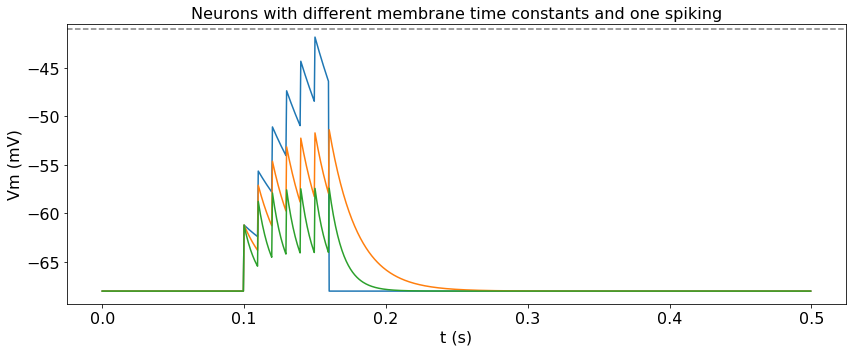

In [2]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.041 * np.ones(3)
v_r = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': 0.04 * np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))

i_ext = np.zeros((len(ts), 3))
ts_i_ext = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]

for t in ts_i_ext:
    i_ext[int(t/dt), :] = 0.0068

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_r=v_r, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

rsp = ntwk.run(spks_up=spks_up, i_ext=i_ext, dt=dt)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * rsp.vs)
ax.axhline(-41, color='gray', ls='--')

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants and one spiking')

set_font_size(ax, 16)

## Test synaptic-input-induced spiking

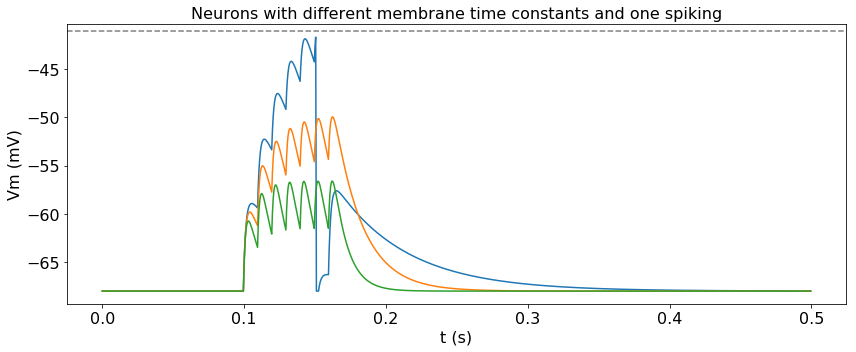

In [3]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.041 * np.ones(3)
v_r = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': 0.04 * np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))
ts_spks_up = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]

for t in ts_spks_up:
    spks_up[int(t/dt), :] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_r=v_r, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

rsp = ntwk.run(spks_up=spks_up, dt=dt)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * rsp.vs)
ax.axhline(-41, color='gray', ls='--')

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants and one spiking')

set_font_size(ax, 16)

## Run identical smln where vs and gs are stored as float16

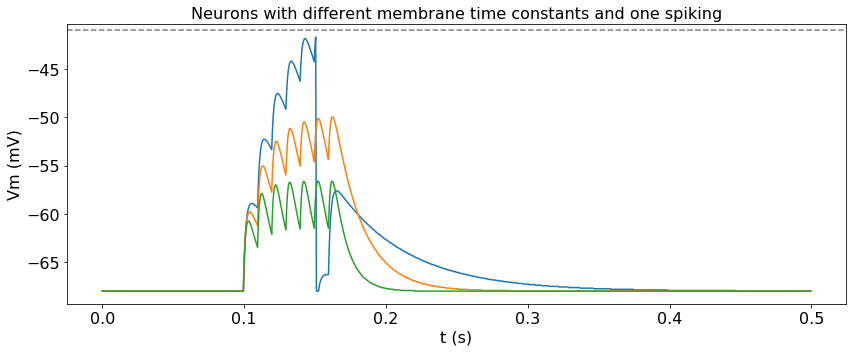

In [4]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.041 * np.ones(3)
v_r = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': 0.04 * np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))
ts_spks_up = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]

for t in ts_spks_up:
    spks_up[int(t/dt), :] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_r=v_r, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

rsp = ntwk.run(spks_up=spks_up, dt=dt, store={'vs': np.float16, 'gs': np.float16})

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * rsp.vs)
ax.axhline(-41, color='gray', ls='--')

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants and one spiking')

set_font_size(ax, 16)

## Run identical smln where gs are not stored

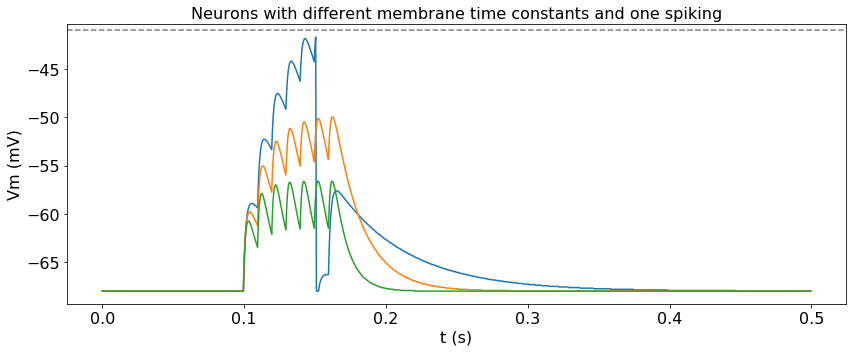

In [5]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.041 * np.ones(3)
v_r = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': 0.04 * np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))
ts_spks_up = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]

for t in ts_spks_up:
    spks_up[int(t/dt), :] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_r=v_r, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

rsp = ntwk.run(spks_up=spks_up, dt=dt, store={'vs': np.float16, 'gs': None})

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * rsp.vs)
ax.axhline(-41, color='gray', ls='--')

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants and one spiking')

set_font_size(ax, 16)

## Run identical smln where only spks are stored

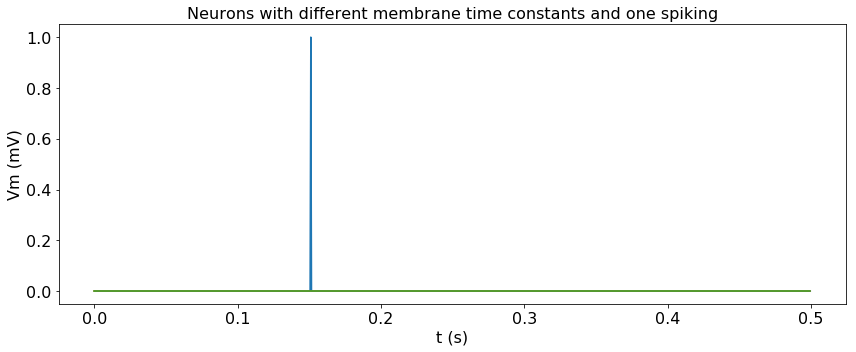

In [6]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = np.array([0.05, 0.02, 0.01])
e_l = -0.068 * np.ones(3)
v_th = -0.041 * np.ones(3)
v_r = -0.068 * np.ones(3)
t_r = 0.002 * np.ones(3)
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((3, 3))}
ws_up = {'E': 0.04 * np.eye(3)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 3))
ts_spks_up = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]

for t in ts_spks_up:
    spks_up[int(t/dt), :] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_r=v_r, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

rsp = ntwk.run(spks_up=spks_up, dt=dt, store={'vs': None, 'gs': None, 'g_ahp': None})

assert rsp.vs is None
assert rsp.gs is None

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, rsp.spks.astype(int))

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different membrane time constants and one spiking')

set_font_size(ax, 16)

## Test cells with different refractory periods

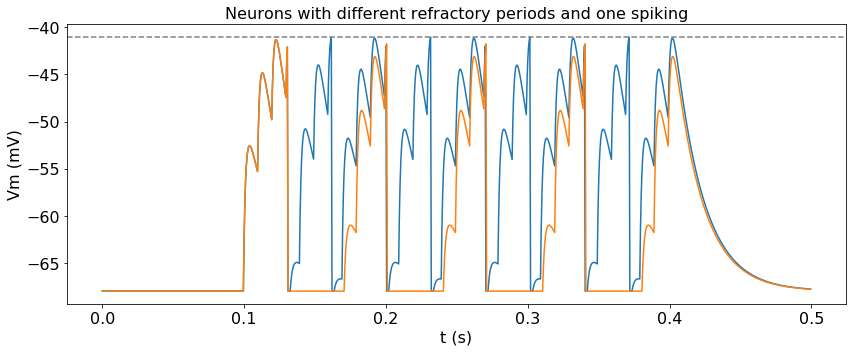

In [7]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size


t_m = 0.02 * np.ones(2)
e_l = -0.068 * np.ones(2)
v_th = -0.041 * np.ones(2)
v_r = -0.068 * np.ones(2)
t_r = np.array([.002, .04])
es_syn = {'E': 0}
ts_syn = {'E': 0.002}
ws_rcr = {'E': np.zeros((2, 2))}
ws_up = {'E': 0.08 * np.eye(2)}

dt = 0.0005
ts = np.arange(0, 0.5, dt)
spks_up = np.zeros((len(ts), 2))
ts_spks_up = np.arange(.1, .4, .01)

for t in ts_spks_up:
    spks_up[int(t/dt), :] = 1

ntwk = LIFNtwk(
    t_m=t_m, e_l=e_l, v_th=v_th, v_r=v_r, t_r=t_r,
    es_syn=es_syn, ts_syn=ts_syn, ws_rcr=ws_rcr, ws_up=ws_up)

rsp = ntwk.run(spks_up=spks_up, dt=dt)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

ax.plot(ts, 1000 * rsp.vs)
ax.axhline(-41, color='gray', ls='--')

ax.set_xlabel('t (s)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neurons with different refractory periods and one spiking')

set_font_size(ax, 16)

## Test high resting potential vs excitatory barrage equivalence

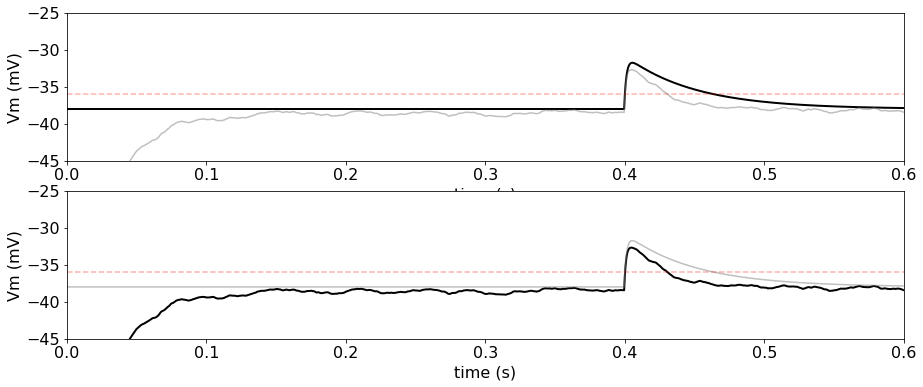

In [8]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ntwk import LIFNtwk
from disp import set_font_size

DT = .0005
T_M_PC = 0.05
E_L_PC = -0.068
V_R_PC = -0.068
V_TH_PC = -0.036
T_R_PC = 0.03
E_E = 0
T_E = 0.002
W_E_PC_ST = 0.0001
W_E_PC_PC = 0.05
RATE_ST = 38000
DUR = 0.6
STIM = 0.4
SEED = 6

np.random.seed(SEED)

# upstream weight matrices
w_up_e = np.array([
    #       EC      PC_UP
    [       0., W_E_PC_PC],
    [W_E_PC_ST, W_E_PC_PC],
])

# upstream spk inputs
t = np.arange(0, DUR, DT)
# 1st col EC, 2nd col upstream PC
spks_up = np.zeros((len(t), 2))

# EC barrage
spks_up[:, 0] = np.random.poisson(RATE_ST * DT, t.shape)
# upstream PC input
spks_up[int(STIM / DT), 1] = 1

# make ntwk
ntwk = LIFNtwk(
    t_m=T_M_PC,
    e_l=np.array([E_L_PC + 0.03, E_L_PC]),
    v_th=100, v_r=V_R_PC, t_r=np.repeat(T_R_PC, 2),
    es_syn={'E': E_E}, ts_syn={'E': T_E},
    ws_up={'E': w_up_e},
    ws_rcr={'E': np.zeros((2, 2))},
)

# run ntwk
vs_0 = np.array([E_L_PC + 0.03, E_L_PC])
rsp = ntwk.run(spks_up=spks_up, dt=DT, vs_0=vs_0)

# plot results
fig, axs = plt.subplots(2, 1, figsize=(15, 6))
axs[0].plot(t, 1000*rsp.vs[:, 0], color='k', lw=2)
axs[0].plot(t, 1000*rsp.vs[:, 1], color='gray', alpha=0.5)
axs[1].plot(t, 1000*rsp.vs[:, 1], color='k', lw=2)
axs[1].plot(t, 1000*rsp.vs[:, 0], color='gray', alpha=0.5)

for ax in axs:
    ax.axhline(1000*V_TH_PC, color='r', ls='--', alpha=0.3)
    
    ax.set_xlim(0, DUR)
    ax.set_ylim(-45, -25)
    
    ax.set_xlabel('time (s)')
    ax.set_ylabel('Vm (mV)')
    
    set_font_size(ax, 16)

Test passed if the gray and green EPSPs are about the same size in both panels.

# Test connectivity functions

## Test function to combine multiple weight matrices into "block" matrix

In [9]:
%reset -f
import numpy as np

from ntwk import join_w

### Square connectivity matrix

In [10]:
w_e_correct = np.array([
    # I   I   E   E   E   I   I
    [ 0,  0,  1,  2,  3,  0,  0],  # I
    [ 0,  0,  4,  5,  6,  0,  0],  # I
    [ 0,  0,  1,  2,  3,  0,  0],  # E
    [ 0,  0,  4,  5,  6,  0,  0],  # E
    [ 0,  0,  7,  8,  9,  0,  0],  # E
    [ 0,  0,  7,  8,  9,  0,  0],  # I
    [ 0,  0, 10, 11, 12,  0,  0],  # I
])

w_i_correct = np.array([
    # I   I   E   E   E   I   I
    [ 1,  2,  0,  0,  0,  3,  4],  # I
    [ 5,  6,  0,  0,  0,  7,  8],  # I
    [ 1,  2,  0,  0,  0,  3,  4],  # E
    [ 5,  6,  0,  0,  0,  7,  8],  # E
    [ 9, 10,  0,  0,  0, 11, 12],  # E
    [ 9, 10,  0,  0,  0, 11, 12],  # I
    [13, 14,  0,  0,  0, 15, 16],  # I
])

w_e_e_e = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

w_e_i_e = np.array([
    [ 1,  2,  3],
    [ 4,  5,  6],
    [ 7,  8,  9],
    [10, 11, 12],
])

w_i_e_i = np.array([
    [ 1,  2,  3,  4],
    [ 5,  6,  7,  8],
    [ 9, 10, 11, 12],
])

w_i_i_i = np.array([
    [ 1,  2,  3,  4],
    [ 5,  6,  7,  8],
    [ 9, 10, 11, 12],
    [13, 14, 15, 16],
])

cells = {
    'E': np.array([0, 0, 1, 1, 1, 0, 0], bool),
    'I': np.array([1, 1, 0, 0, 0, 1, 1], bool),
}

ws = {
    'E': {
        ('E', 'E'): w_e_e_e,
        ('I', 'E'): w_e_i_e,
    },
    'I': {
        ('E', 'I'): w_i_e_i,
        ('I', 'I'): w_i_i_i,
    }
}

ws_full = join_w(targs=cells, srcs=cells, ws=ws)

np.testing.assert_array_equal(ws_full['E'], w_e_correct)
np.testing.assert_array_equal(ws_full['I'], w_i_correct)

print('Tests passed.')

Tests passed.


### Non-square connectivity matrix

In [11]:
w_e_correct = np.array([
    # UE  UI  UI  UE  UE
    [ 1,  0,  0,  2,  3],  # DE
    [ 1,  0,  0,  2,  3],  # DI
    [ 4,  0,  0,  5,  6],  # DE
    [ 4,  0,  0,  5,  6],  # DI
    [ 7,  0,  0,  8,  9],  # DI
    [10,  0,  0, 11, 12],  # DI
])

w_i_correct = np.array([
    # UE  UI  UI  UE  UE
    [ 0,  1,  2,  0,  0],  # DE
    [ 0,  1,  2,  0,  0],  # DI
    [ 0,  3,  4,  0,  0],  # DE
    [ 0,  3,  4,  0,  0],  # DI
    [ 0,  5,  6,  0,  0],  # DI
    [ 0,  7,  8,  0,  0],  # DI
])

w_e_de_ue = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

w_e_di_ue = np.array([
    [ 1,  2,  3],
    [ 4,  5,  6],
    [ 7,  8,  9],
    [10, 11, 12],
])

w_i_de_ui = np.array([
    [ 1,  2],
    [ 3,  4],
])

w_i_di_ui = np.array([
    [ 1,  2],
    [ 3,  4],
    [ 5,  6],
    [ 7,  8],
])

targs = {
    'DE': np.array([1, 0, 1, 0, 0, 0], bool),
    'DI': np.array([0, 1, 0, 1, 1, 1], bool),
}

srcs = {
    'UE': np.array([1, 0, 0, 1, 1], bool),
    'UI': np.array([0, 1, 1, 0, 0], bool),
}

ws = {
    'E': {
        ('DE', 'UE'): w_e_de_ue,
        ('DI', 'UE'): w_e_di_ue,
    },
    'I': {
        ('DE', 'UI'): w_i_de_ui,
        ('DI', 'UI'): w_i_di_ui,
    }
}

ws_full = join_w(targs=targs, srcs=srcs, ws=ws)

np.testing.assert_array_equal(ws_full['E'], w_e_correct)
np.testing.assert_array_equal(ws_full['I'], w_i_correct)

print('Tests passed.')

Tests passed.
